## Data Exploration
<p> to understand the data </p>



in this dataset, all the attributes are important and some of them are dependent in each other.  <br>So no attributes gonna be drops .

1. pH value:<br>PH is an important parameter in evaluating the acid–base balance of water. 6.52–6.83 are the range of WHO standards <br><br><br>
2. Hardness:<br>Hardness is mainly caused by calcium and magnesium salts.<br><br>
3. Solids (Total dissolved solids - TDS):<br>the dissolved  inorganic/organic minerals or salts in water  <br><br><br>
4. Chloramines:<br>Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. <br><br><br>
5. Sulfate:<br>naturally occurring substances that are found in groundwater<br><br><br>
6. Conductivity:<br>Pure water is not a good conductor of electric current rather’s a good insulator. the amount of dissolved solids in water determines the electrical conductivity. According to WHO standards, EC value should not exceeded 400 μS/cm.<br><br><br>
7. Organic_carbon:<br>TOC is a measure of the total amount of carbon in organic compounds in pure water.<br><br><br>
8. Trihalomethanes:<br>THMs are chemicals which may be found in water treated with chlorine.<br><br><br>
9. Turbidity:<br>The turbidity of water depends on the quantity of solid matter present in the suspended state.<br><br><br>
10. Potability:<br>Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

<h1>1-Visualisation </h1>

In [318]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [319]:
# reading the dataset form the file
main_df = pd.read_csv('water_potability.csv')
df = main_df.copy()
df.drop_duplicates()
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [320]:
# the 
df.info()
print("\nthe number of the Row: ",df.shape[0])
print("the number of the Column: ",df.shape[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

the number of the Row:  3276
the number of the Column:  10


In [321]:
# the number of the unuique value in each Column --to see if there's any bias 
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [322]:
# the Total number of null value in each Column
print(df.isnull().sum())
df.dtypes

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

as shown above the missing values are in Ph , Sulfate ,Trihalomethanes


<Axes: >

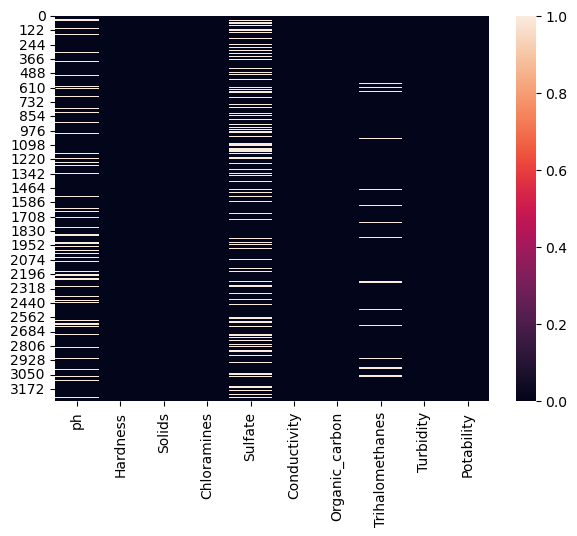

In [323]:
# graph the gap--nun -null
sns.heatmap(df.isnull())

<Axes: >

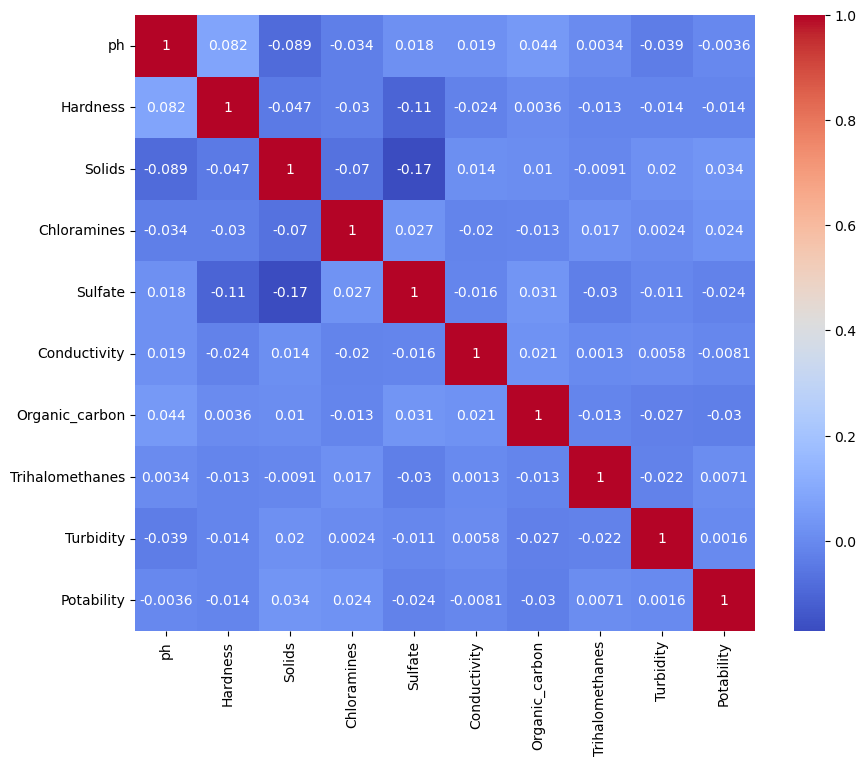

In [324]:
# assess the strength of associations between data variables.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [325]:
# Unstacking the correlation matrix to see the values more clearly.
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Hardness  Sulfate           0.106923
ph        Solids            0.089288
Hardness  ph                0.082096
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.043503
dtype: float64

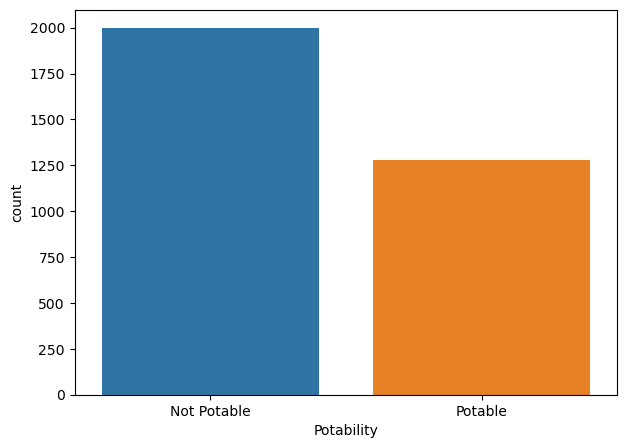

In [326]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [327]:
x = df.Potability.value_counts()
labels = [0,1]
dif=x[0]-x[1]
print(x)
print("the dataset is imbalanced by more than %d for not-potable"%dif)

0    1998
1    1278
Name: Potability, dtype: int64
the dataset is imbalanced by more than 720 for not-potable


as shown above the dataset is imbalanced 

<Axes: xlabel='Potability', ylabel='ph'>

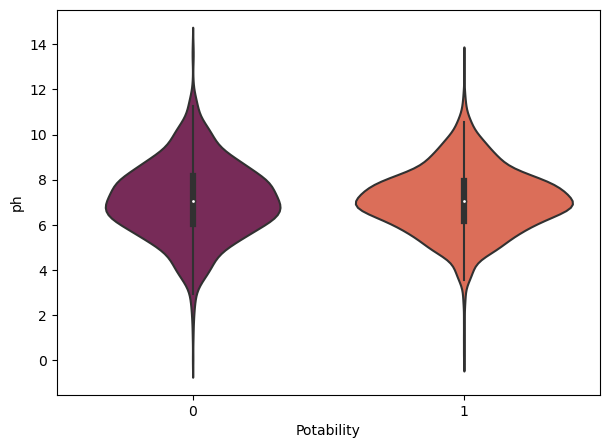

In [328]:
# as  Mention ph should be in range of 6.5 – 8.5 
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket')

as shown most of the values of ph in portabil calss bettwen 6-9

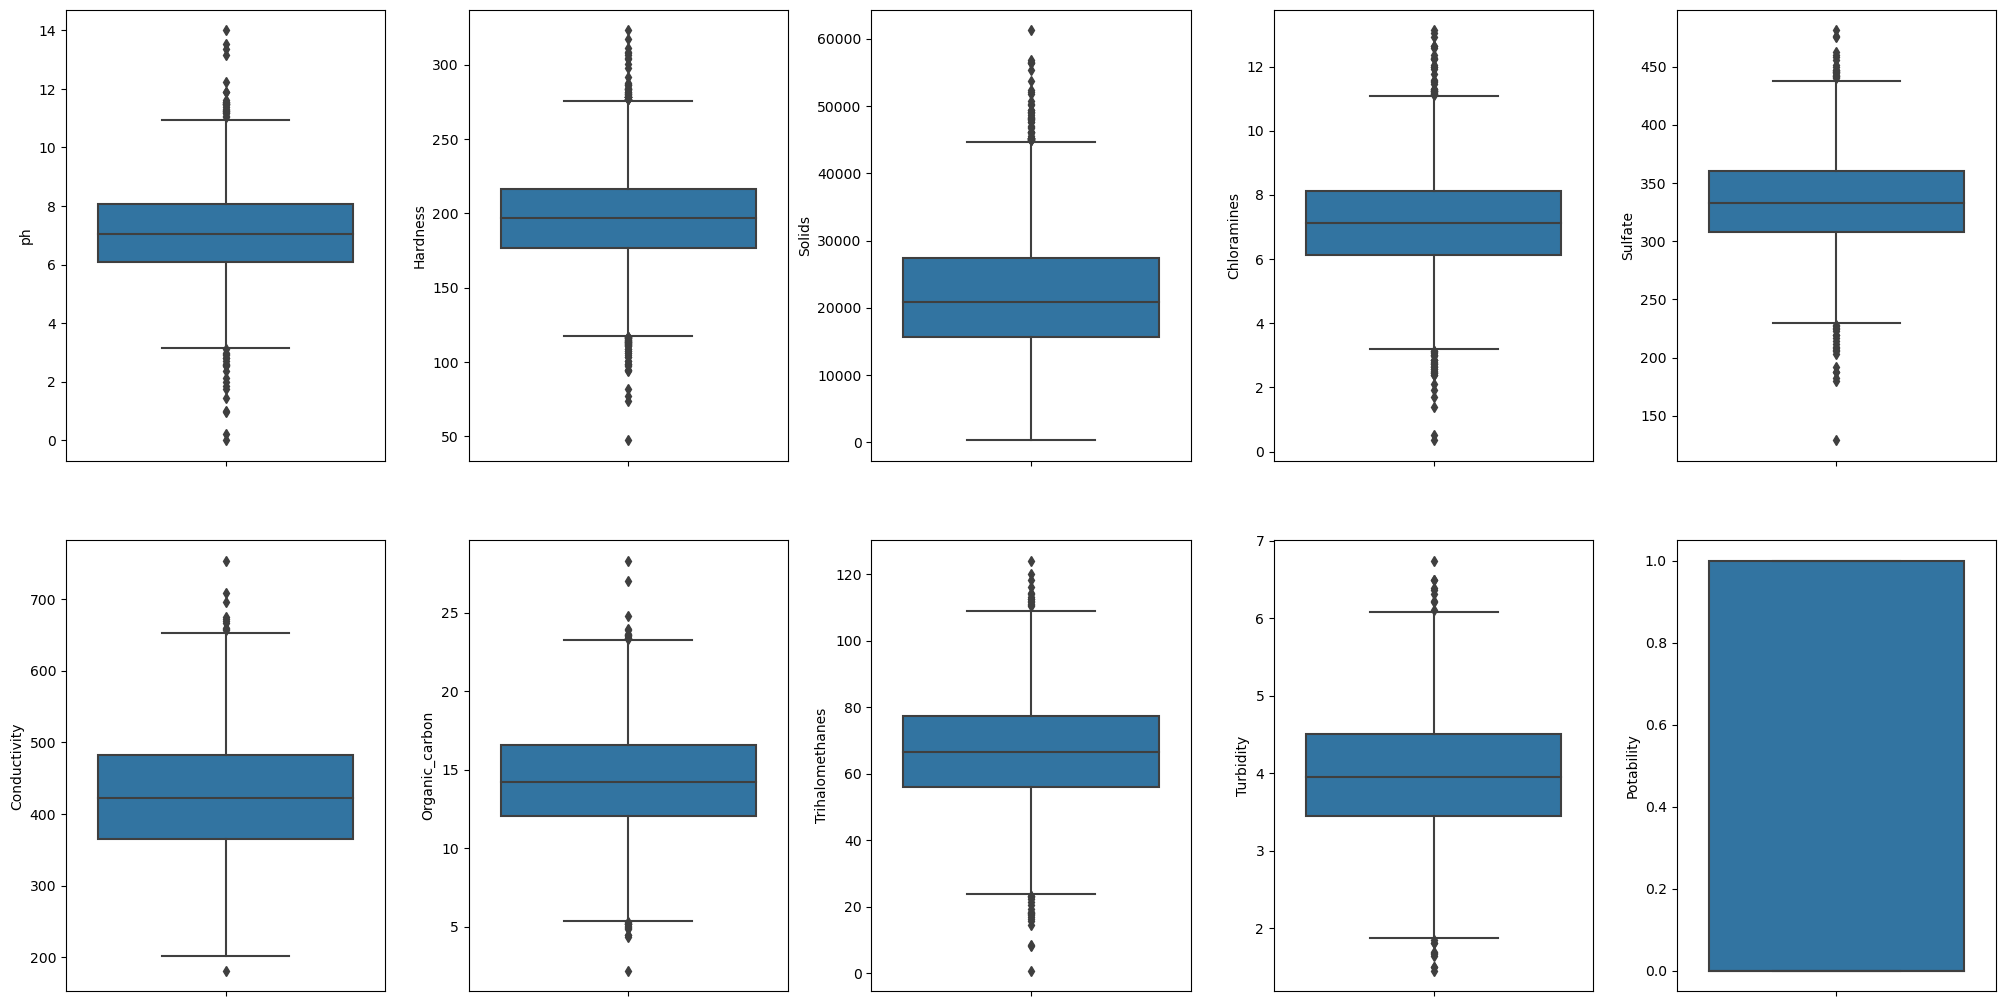

In [329]:
# Visualizing dataset and also checking for outliers 

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

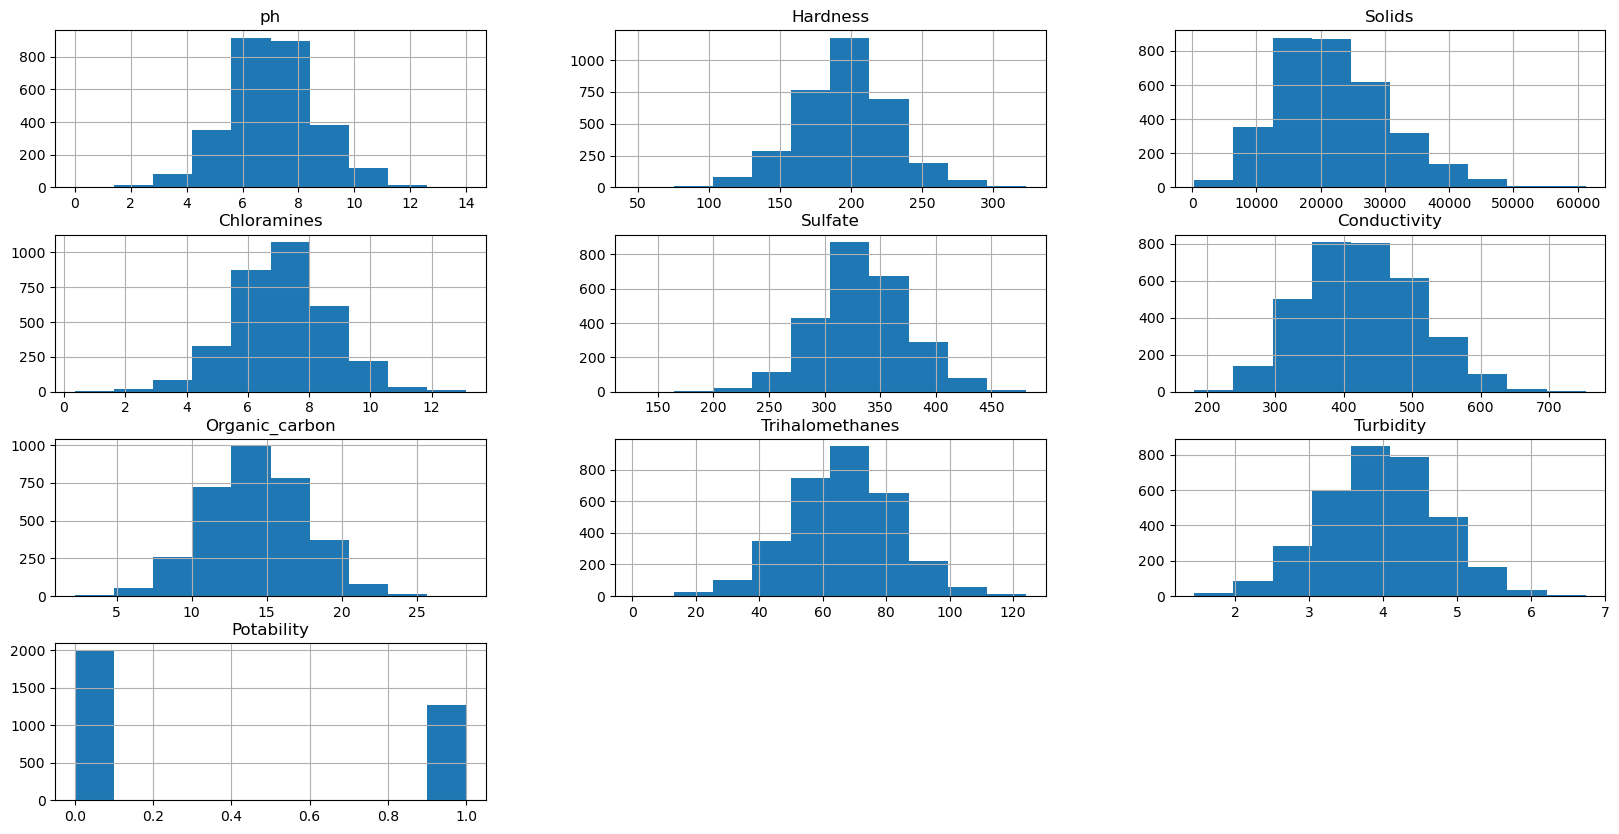

In [330]:
# see the values range of all the column 
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

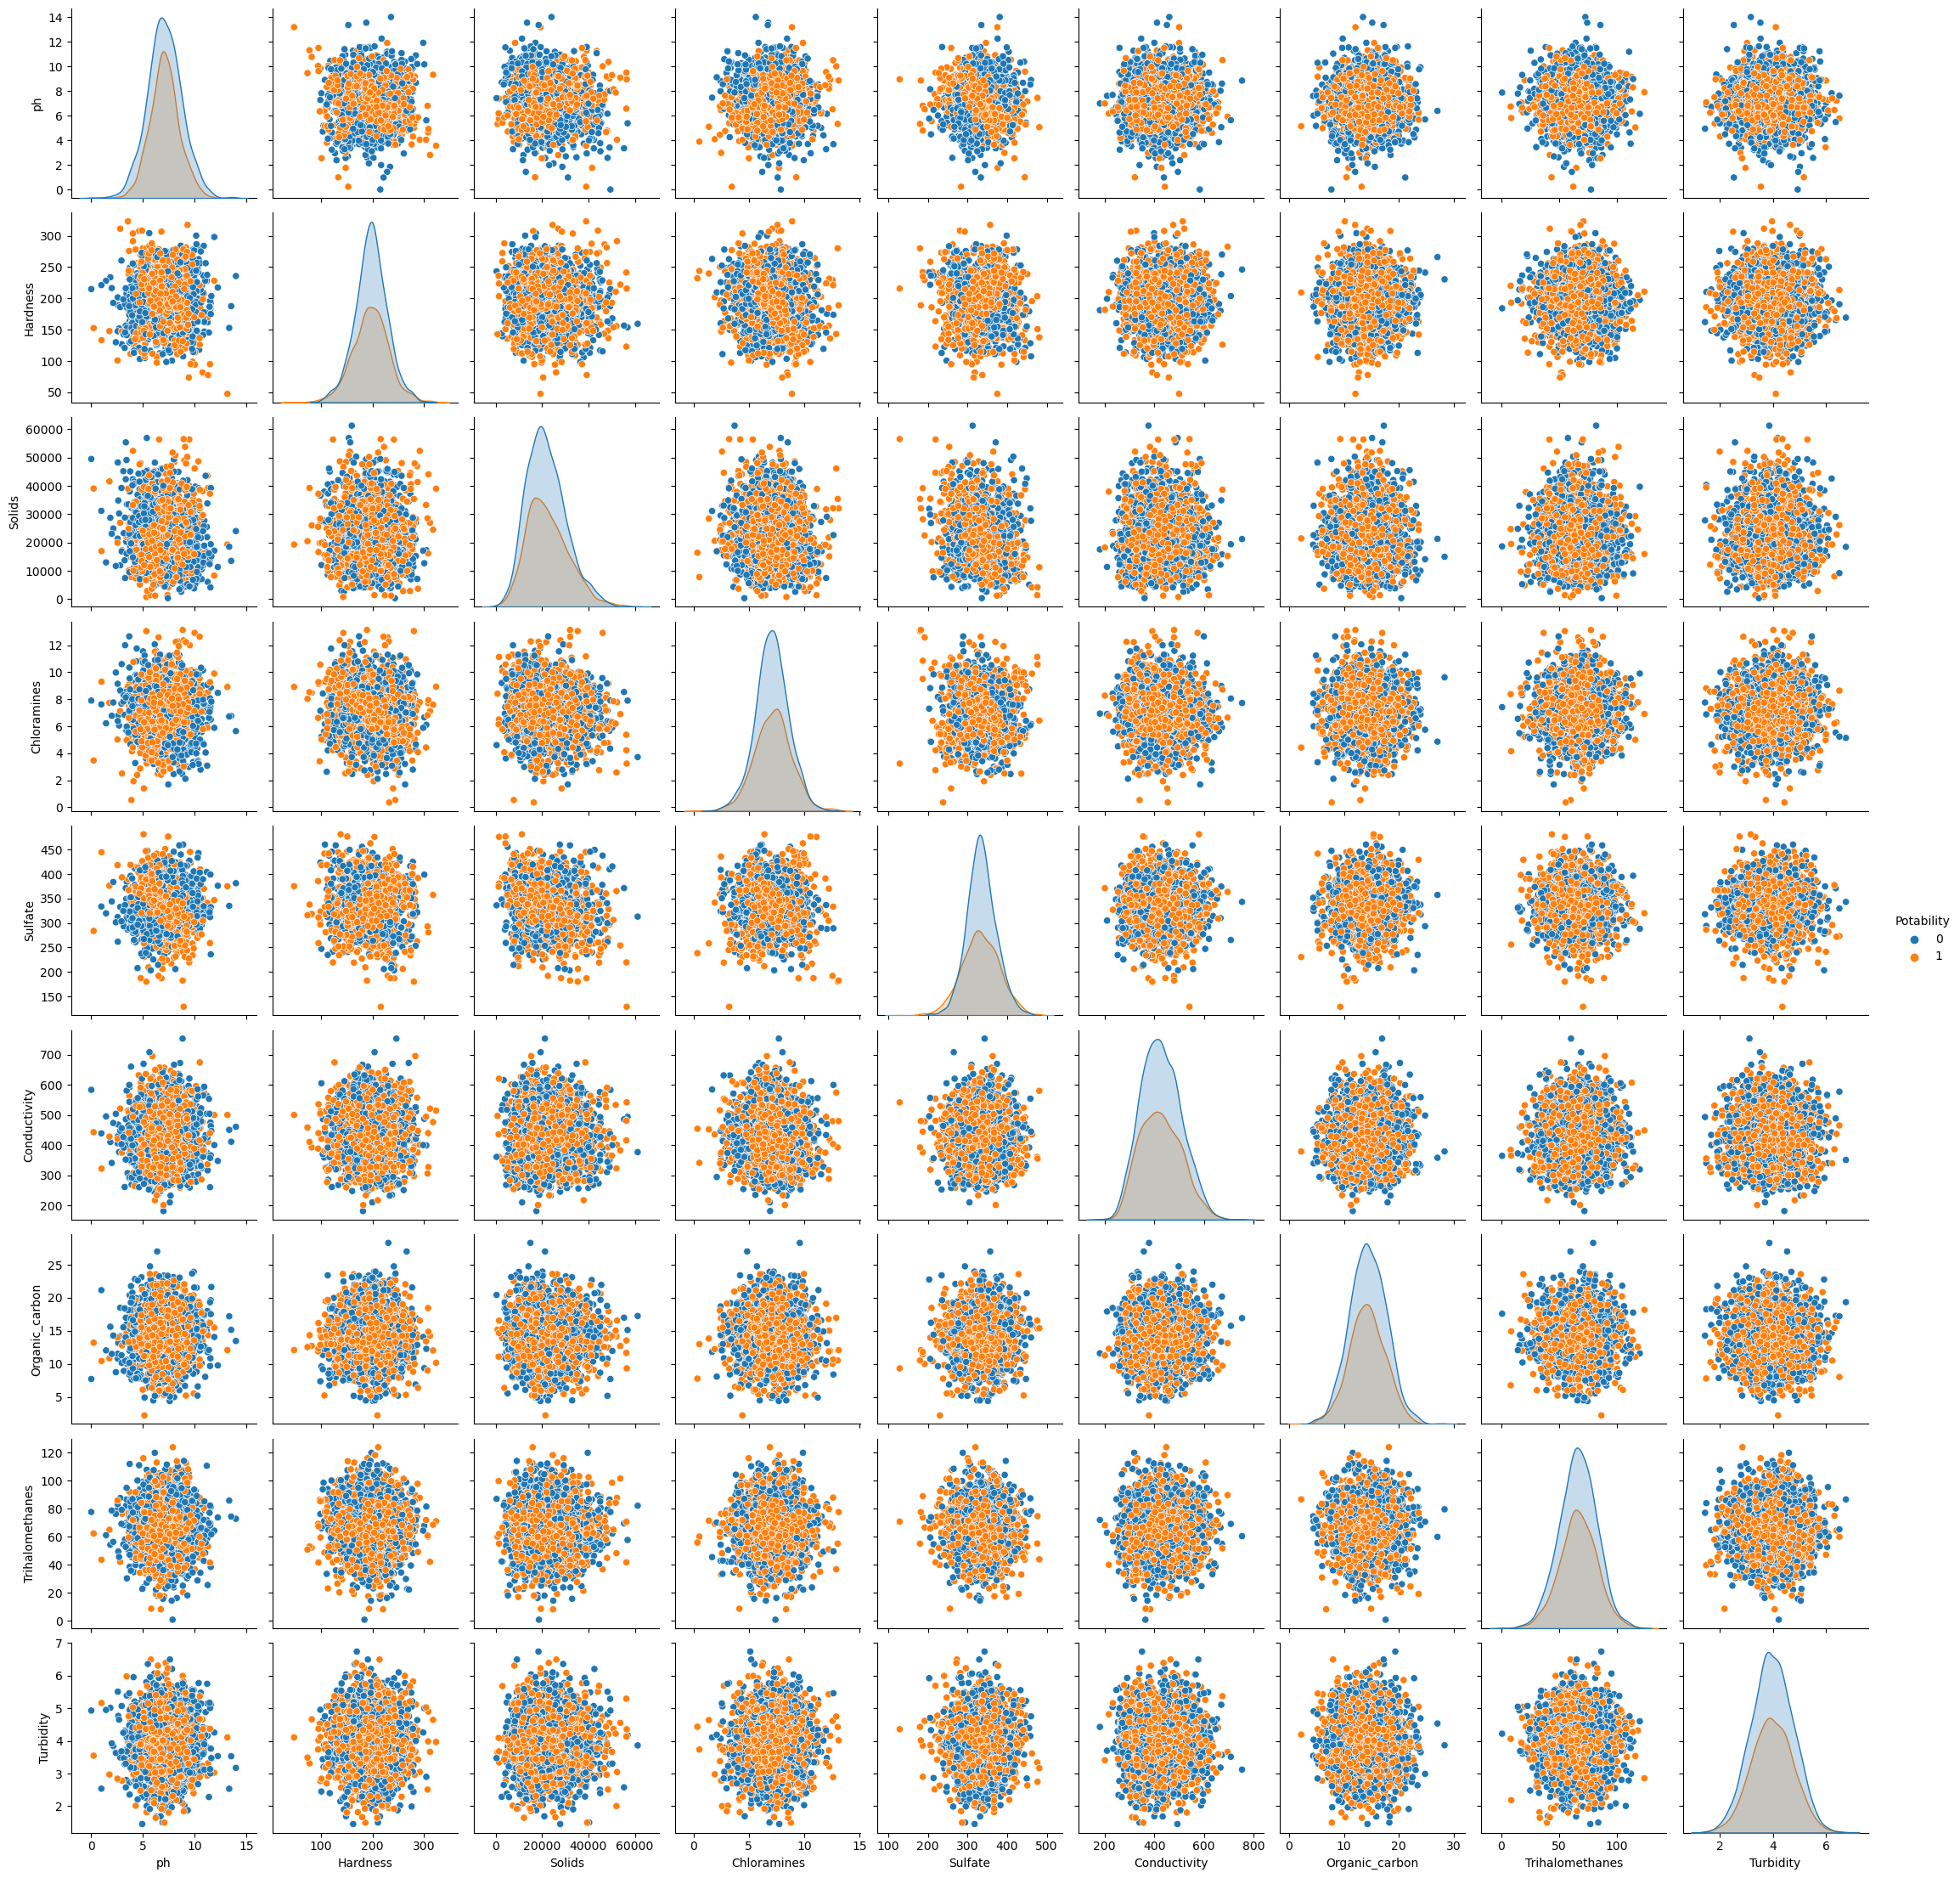

In [331]:
# here will disply the varinse of the data in the two calsses that we have 
sns.pairplot(df, hue="Potability") 

In [332]:
# a summary of statistics pertaining to the DataFrame columns 
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [333]:
# ph is important let see its distrpition 
plt.rcParams['figure.figsize'] = [7,5]
fig = px.box(df, x="Potability", y="ph", color="Potability", width=800, height=400)
fig.show()

In [334]:
fig = px.box(df, x="Potability", y="Hardness", color="Potability", width=800, height=400)
fig.show()

In [335]:

fig = px.histogram (df, x = "Sulfate",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

In [336]:
fig = px.histogram (df, x = "Trihalomethanes",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

In [337]:
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()

## Data Cleaning


ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

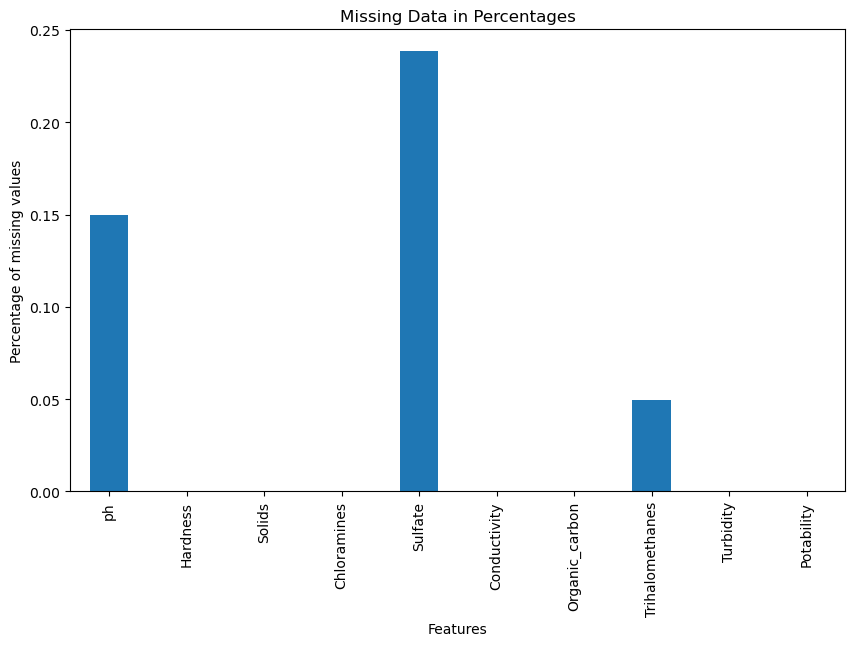

In [338]:
# the percentages of the missing values in each colunm 
df.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages')

df.isnull().mean()*100

In [339]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [340]:
df.head()


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [341]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

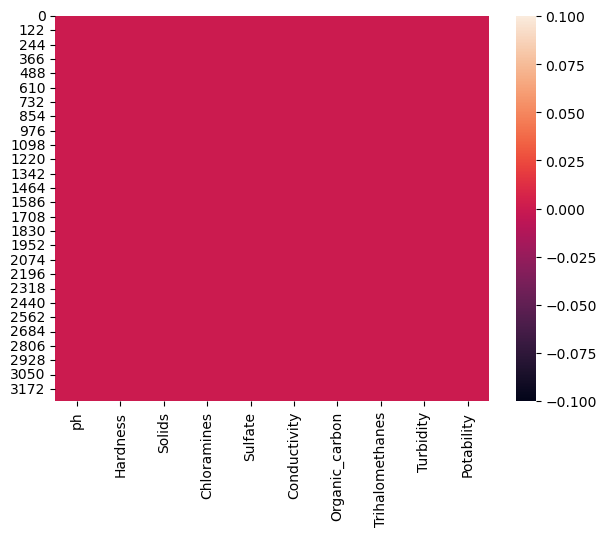

In [342]:
sns.heatmap(df.isnull())

<h1>Dealing with Imbalanced Datasets

In [405]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [406]:
from sklearn.model_selection import train_test_split

x = df.drop('Potability', axis=1)
y = df['Potability']

scaler = StandardScaler()
X = scaler.fit_transform(x)


In [407]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=123)

In [408]:
y_train.value_counts()

0    1333
1     861
Name: Potability, dtype: int64

In [409]:
smote = SMOTE(sampling_strategy='minority')
x_sm , y_sm = smote.fit_resample(x_train, y_train)

In [410]:
y_sm.value_counts()

0    1333
1    1333
Name: Potability, dtype: int64

## Model Bulid

In [411]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model_svm = SVC(kernel='rbf', random_state = 123)
model_svm.fit(x_sm, y_sm)

SVC(random_state=123)

<h1> Accuracy of randm stat = 123 and test size = 0.33 and balanced Datasets

In [412]:
pred_svm = model_svm.predict(x_test)
sv = accuracy_score(y_test, pred_svm)*100
print("accuracy: %5.2f "%(sv))


accuracy: 56.75 


<Axes: >

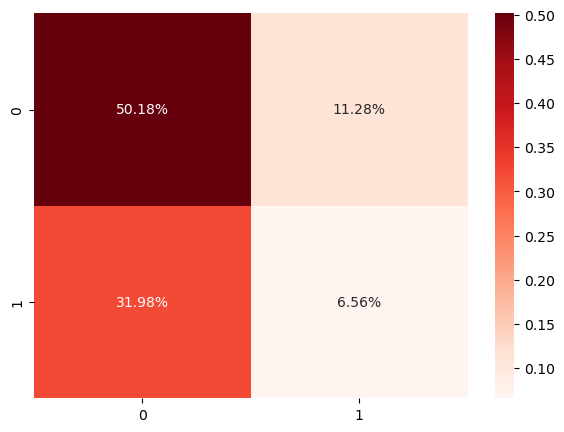

In [413]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Optimisation

In [414]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [415]:
model_svm2= SVC(kernel='rbf', random_state = 42)
model_svm2.fit(X2_train, Y2_train)

SVC(random_state=42)

<h1> Accuracy of randm stat = 42 and test size = 0.2 and imbalanced Datasets

In [416]:
pred_svm2 = model_svm2.predict(X2_test)
sv = accuracy_score(Y2_test, pred_svm2)*100
print("accuracy: %5.2f%s"%(sv,"%"))

accuracy: 69.51%


<Axes: >

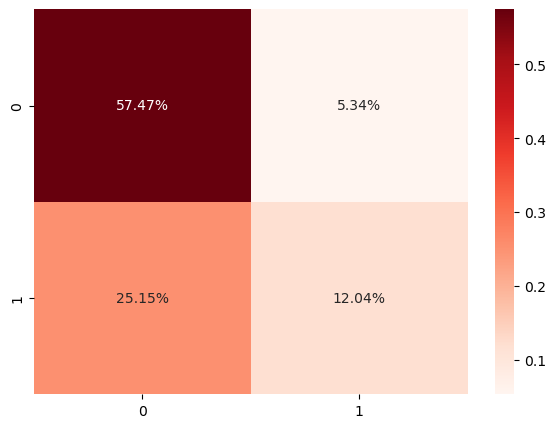

In [417]:
# confusion Maxtrix
cm6 = confusion_matrix(Y2_test, pred_svm2)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')